In [1]:
from sklearn import cross_validation
from scikits.statsmodels.tools import categorical
from sklearn import linear_model
import time

In [2]:
execfile('../ML_Challenge_data_preprocessing.py')

('Generated X with shape ', (347698, 1000))
('Generated y with shape ', (347698,))


In [3]:
# split into promotors and enhancers
promoter_idcs = (y == 0).nonzero()[0]
num_promoters = len(promoter_idcs)
enhancer_idcs = (y == 1).nonzero()[0]
num_enhancers = len(enhancer_idcs)
assert(num_promoters + num_enhancers == X.shape[0])
promoter_X = X[promoter_idcs,]
enhancer_X = X[enhancer_idcs,]
print promoter_X.shape
print enhancer_X.shape

(274299, 1000)
(73399, 1000)


In [5]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np

%matplotlib inline
execfile('../ngram_frequencies.py')
import random

promoter_frequencies = {}
enhancer_frequencies = {}

for i in range(1000):
    promoter_randint = int(random.random()*promoter_X.shape[0])
    enhancer_randint = int(random.random()*enhancer_X.shape[0])
    pfreqs = ngram_frequencies(promoter_X[promoter_randint],3)
    efreqs = ngram_frequencies(enhancer_X[enhancer_randint],3)
    for ngram, frequency in pfreqs.iteritems():
        if ngram in promoter_frequencies:
            promoter_frequencies[ngram].append(frequency)
        else:
            promoter_frequencies[ngram] = [frequency]
    for ngram, frequency in efreqs.iteritems():
        if ngram in enhancer_frequencies:
            enhancer_frequencies[ngram].append(frequency)
        else:
            enhancer_frequencies[ngram] = [frequency]

Plotting frequency histogram for base pair CTT


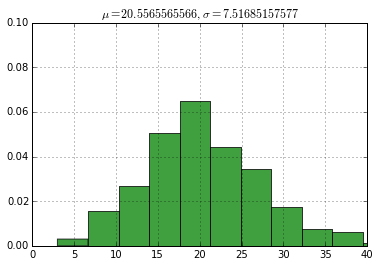

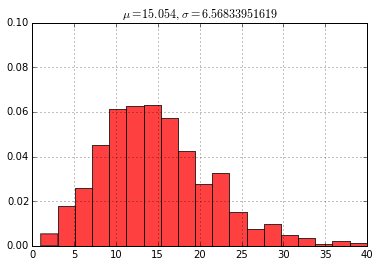




Plotting frequency histogram for base pair ATG


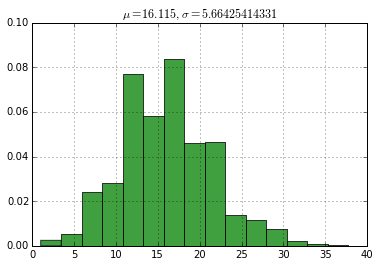

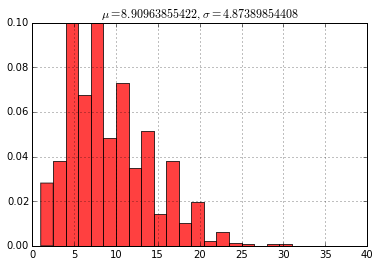




Plotting frequency histogram for base pair AAG


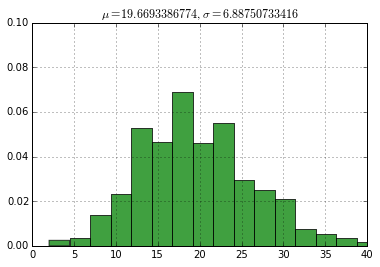

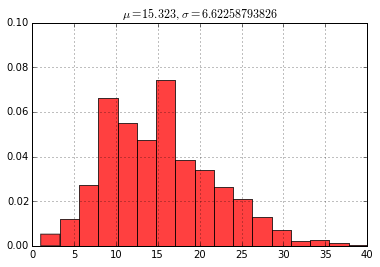




Plotting frequency histogram for base pair AAA


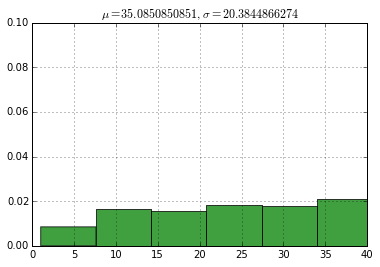

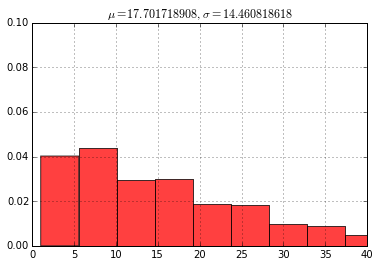




Plotting frequency histogram for base pair ATC


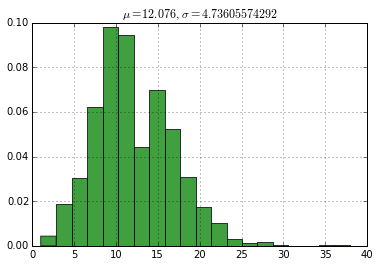

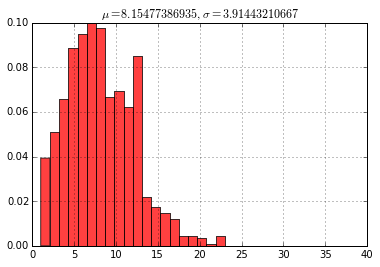




Plotting frequency histogram for base pair AAC


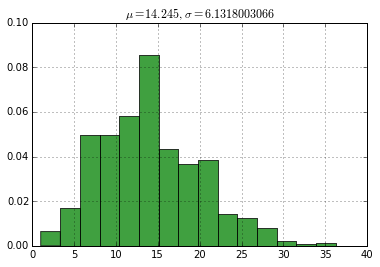

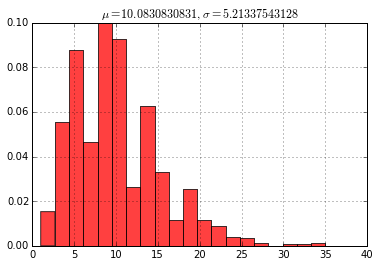




Plotting frequency histogram for base pair ATA


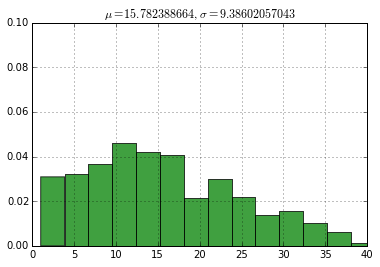

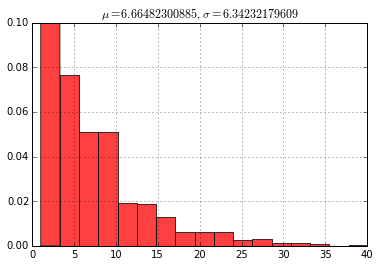




Plotting frequency histogram for base pair AGG


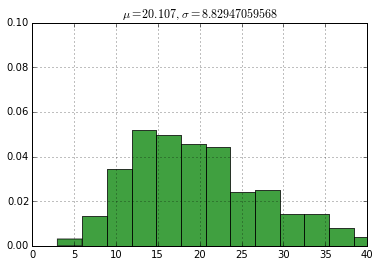

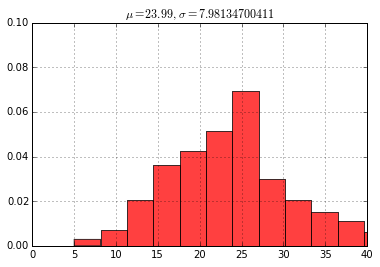




Plotting frequency histogram for base pair CCT


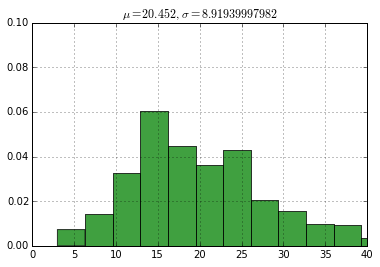

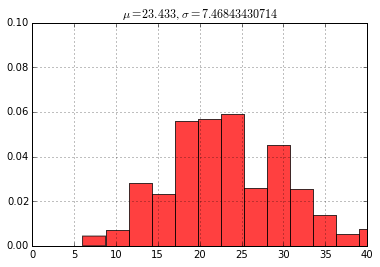




Plotting frequency histogram for base pair ACT


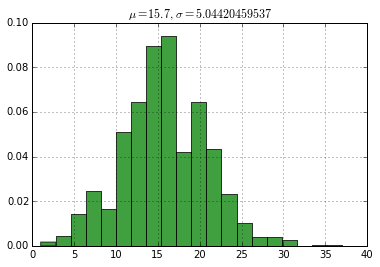

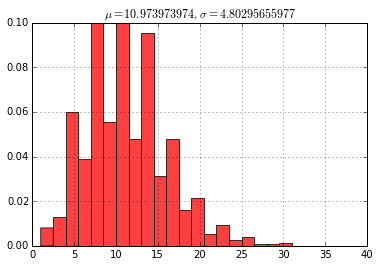




Plotting frequency histogram for base pair AGC


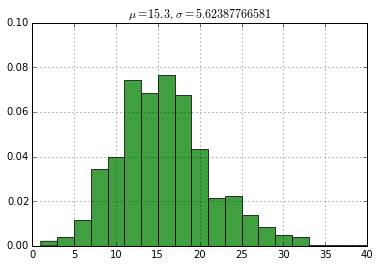

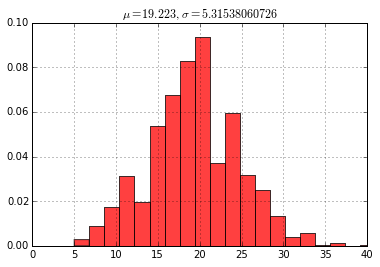




Plotting frequency histogram for base pair ACA


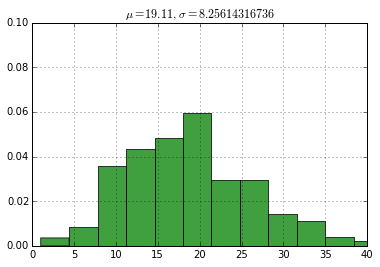

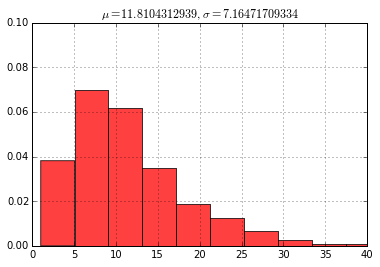




Plotting frequency histogram for base pair AGA


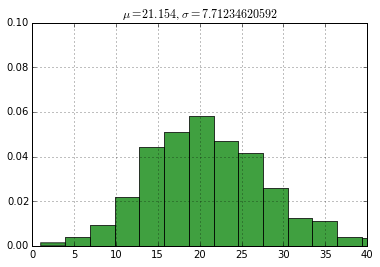

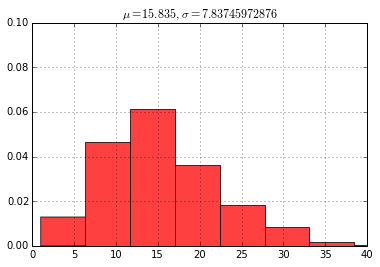




Plotting frequency histogram for base pair CAT


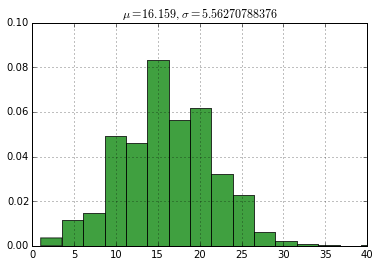

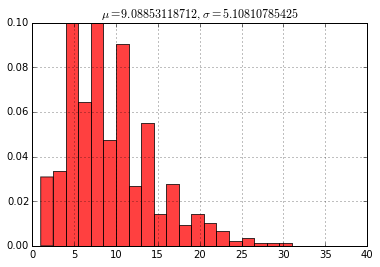




Plotting frequency histogram for base pair AAT


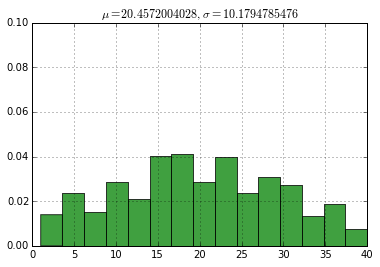

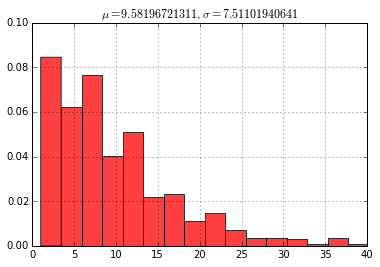




Plotting frequency histogram for base pair ATT


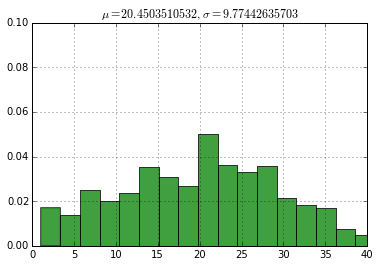

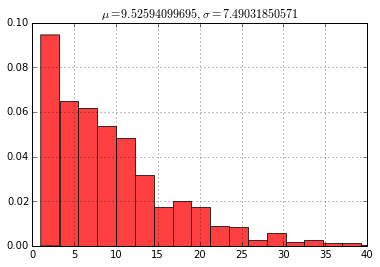




Plotting frequency histogram for base pair CTG


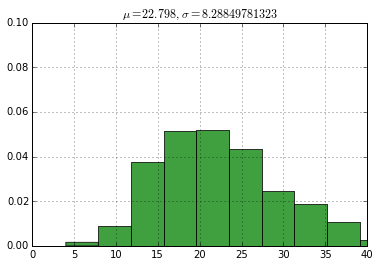

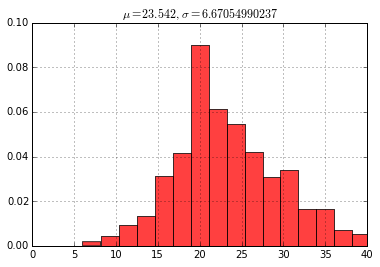




Plotting frequency histogram for base pair CTA


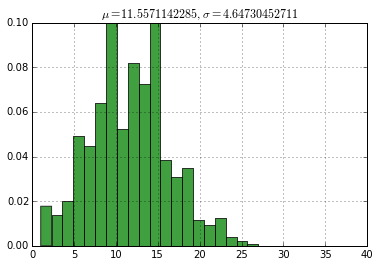

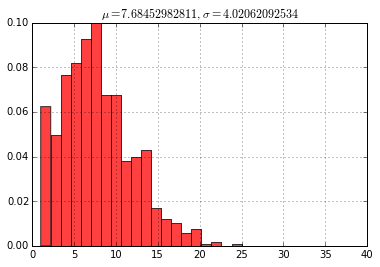




Plotting frequency histogram for base pair CTC


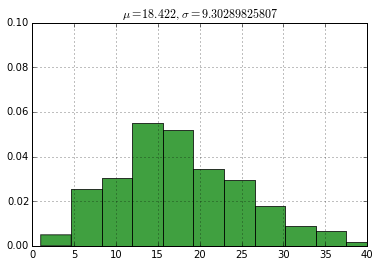

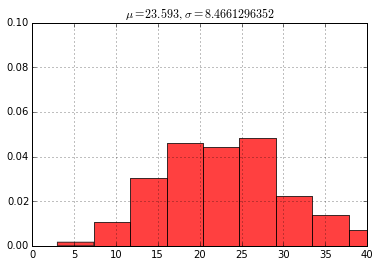




Plotting frequency histogram for base pair CAC


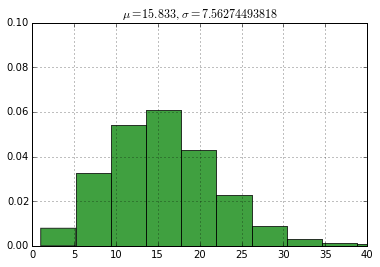

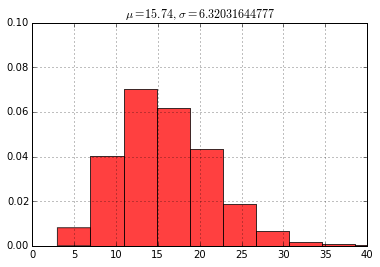




Plotting frequency histogram for base pair ACG


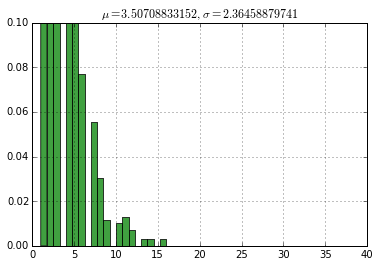

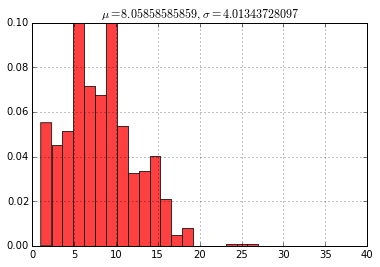




Plotting frequency histogram for base pair CAA


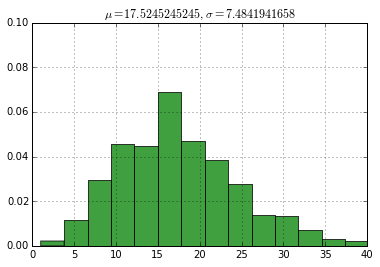

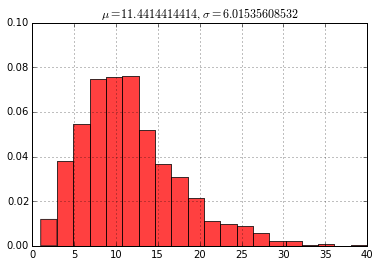




Plotting frequency histogram for base pair AGT


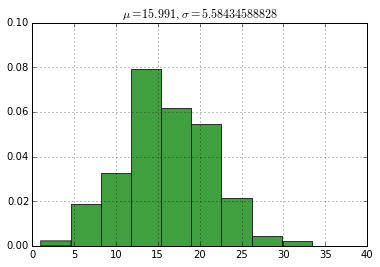

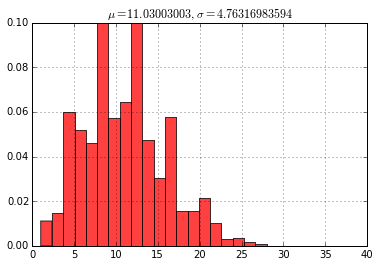




Plotting frequency histogram for base pair CAG


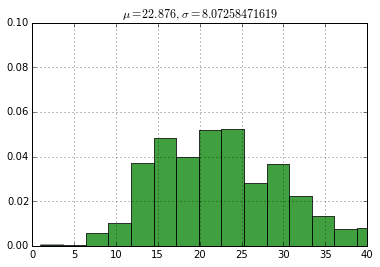

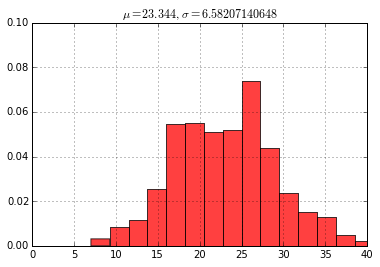




Plotting frequency histogram for base pair CCG


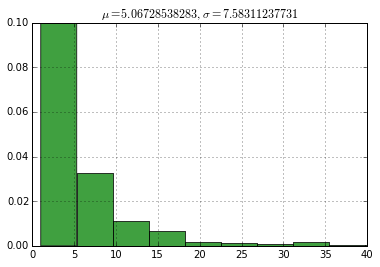

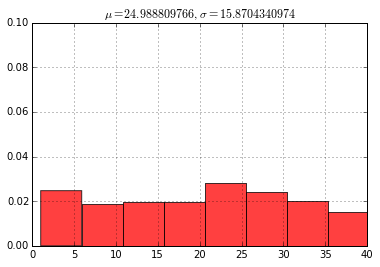




Plotting frequency histogram for base pair CCC


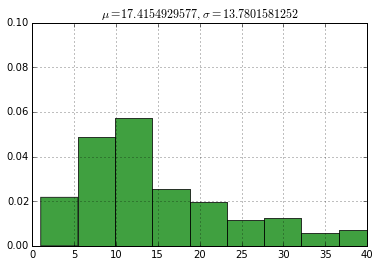

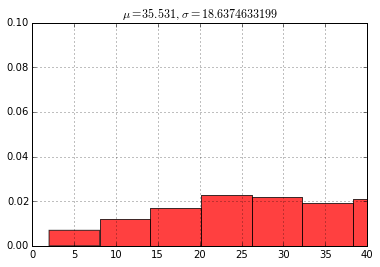




Plotting frequency histogram for base pair TAT


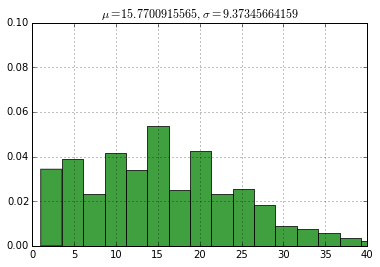

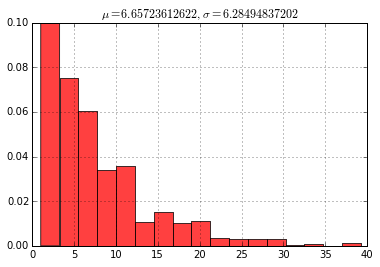




Plotting frequency histogram for base pair GGT


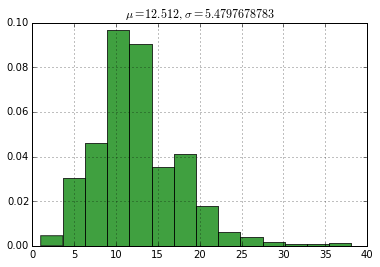

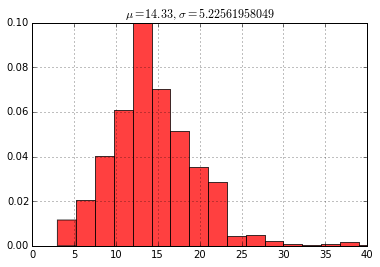




Plotting frequency histogram for base pair TGT


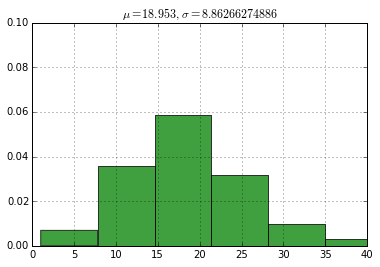

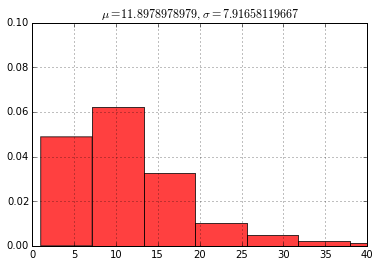




Plotting frequency histogram for base pair CGA


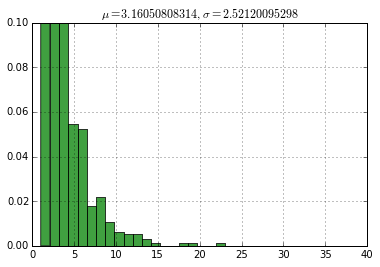

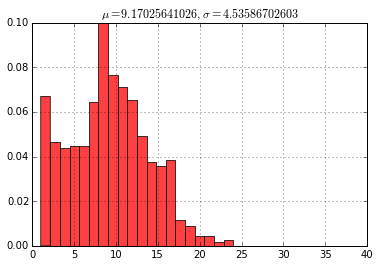




Plotting frequency histogram for base pair CCA


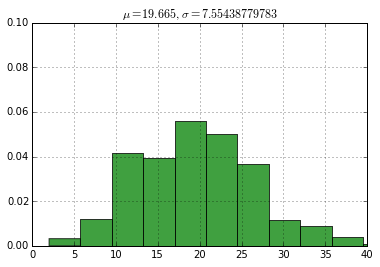

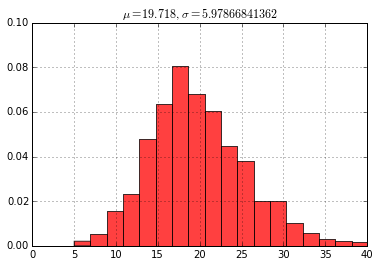




Plotting frequency histogram for base pair TCT


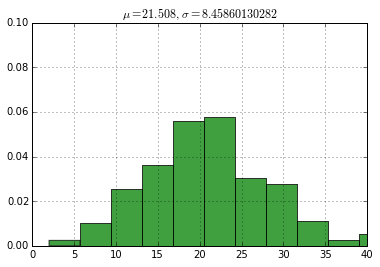

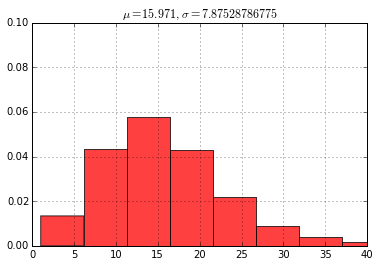




Plotting frequency histogram for base pair GAT


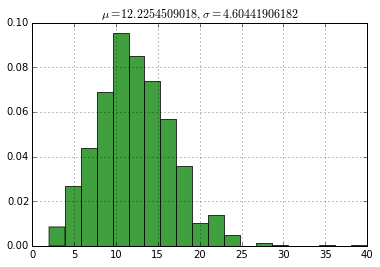

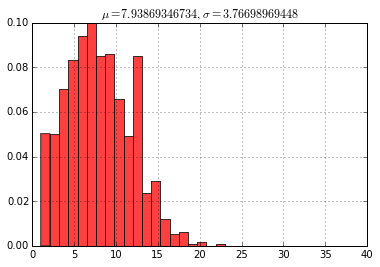




Plotting frequency histogram for base pair CGG


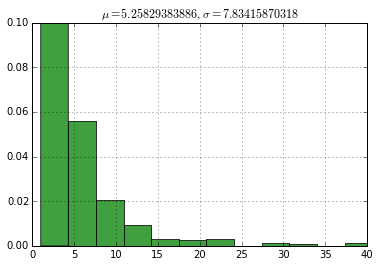

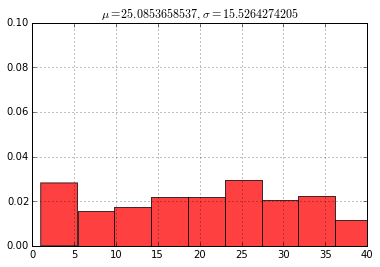




Plotting frequency histogram for base pair TTT


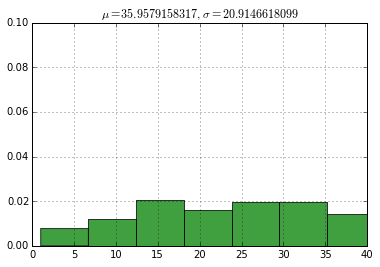

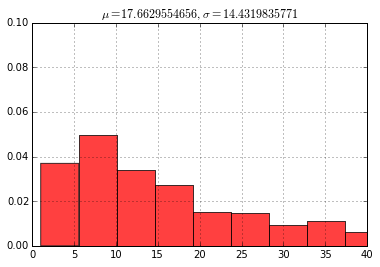




Plotting frequency histogram for base pair TGC


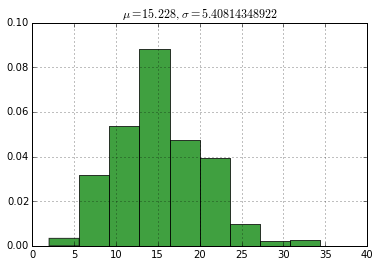

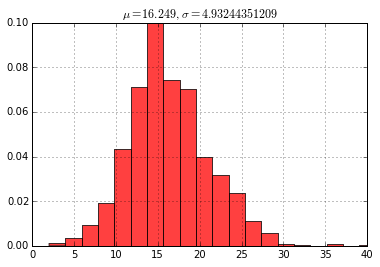




Plotting frequency histogram for base pair GGG


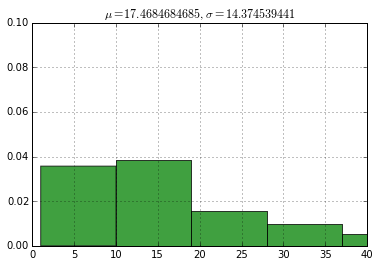

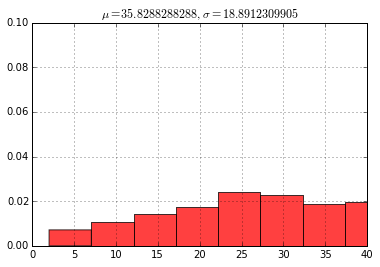




Plotting frequency histogram for base pair TAG


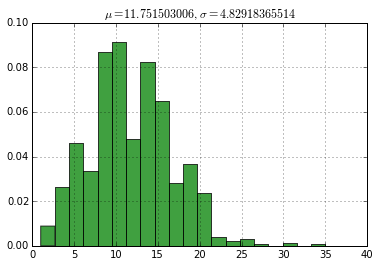

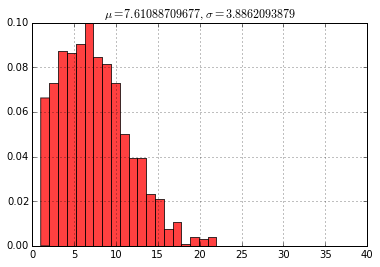




Plotting frequency histogram for base pair GGA


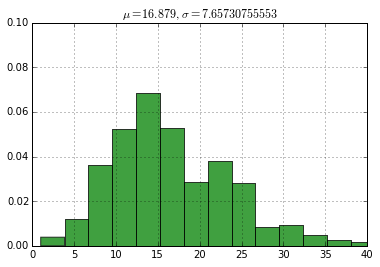

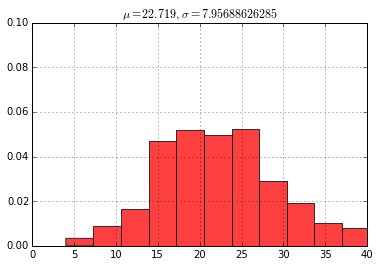




Plotting frequency histogram for base pair TGG


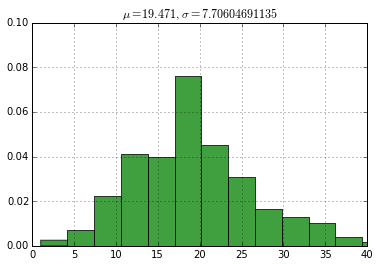

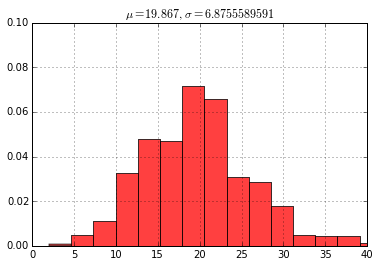




Plotting frequency histogram for base pair GGC


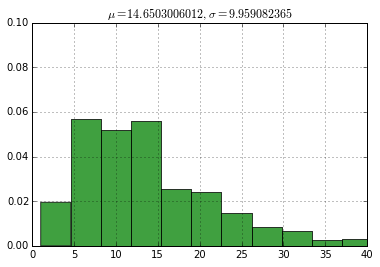

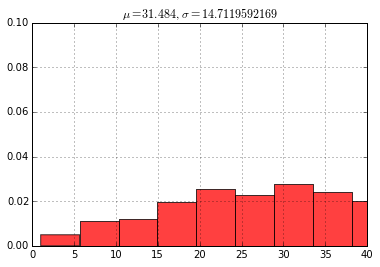




Plotting frequency histogram for base pair TAC


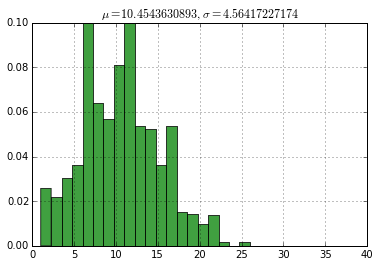

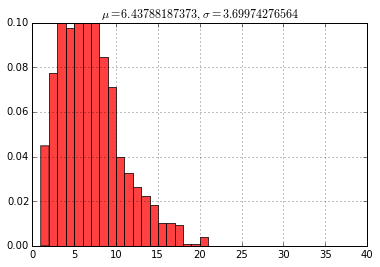




Plotting frequency histogram for base pair GAG


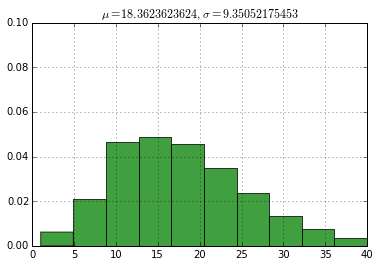

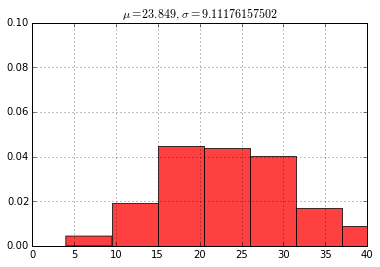




Plotting frequency histogram for base pair TCG


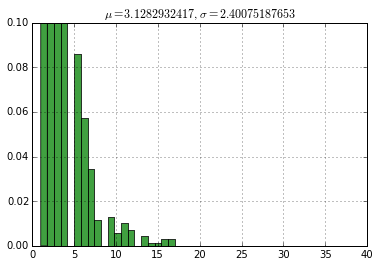

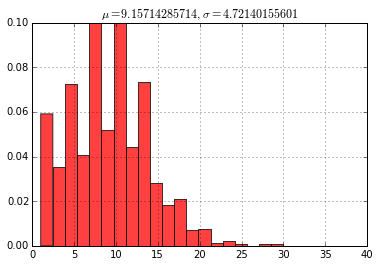




Plotting frequency histogram for base pair TTA


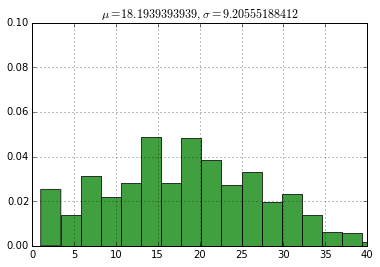

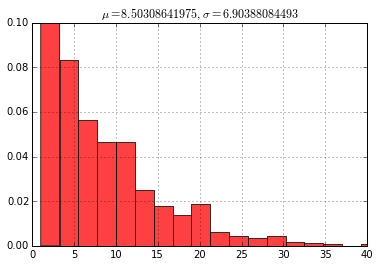




Plotting frequency histogram for base pair TTG


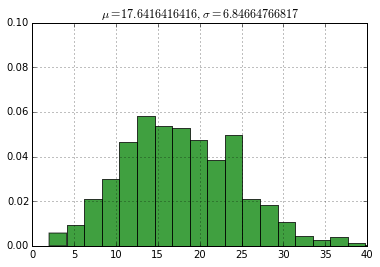

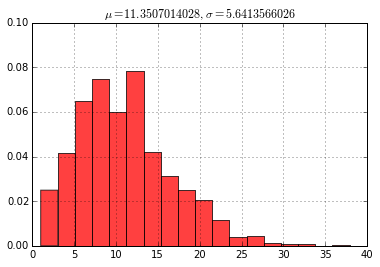




Plotting frequency histogram for base pair TCC


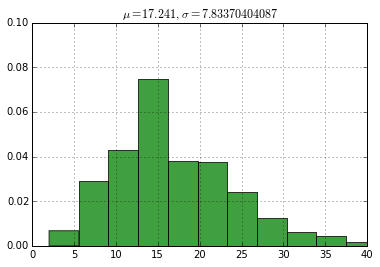

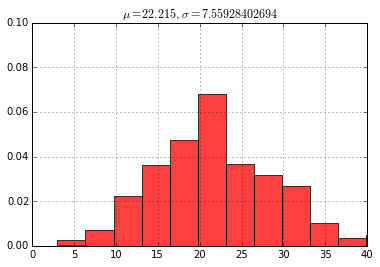




Plotting frequency histogram for base pair GAA


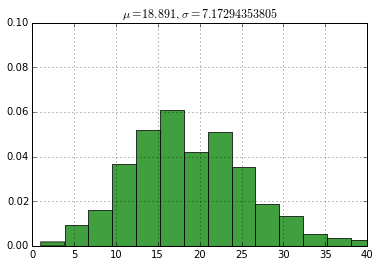

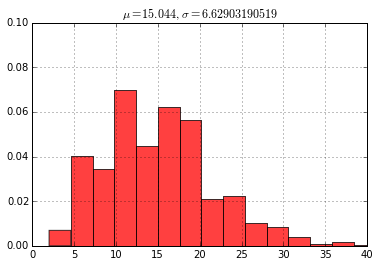




Plotting frequency histogram for base pair TAA


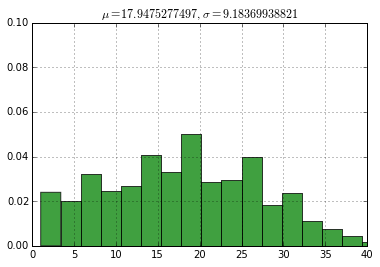

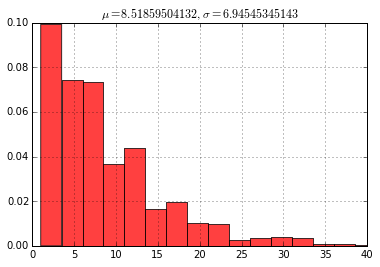




Plotting frequency histogram for base pair GCA


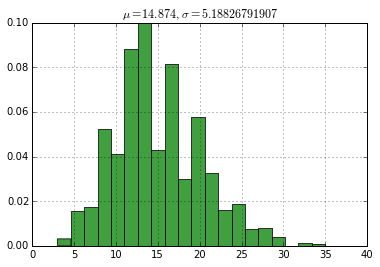

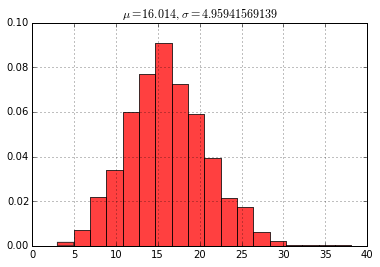




Plotting frequency histogram for base pair GTA


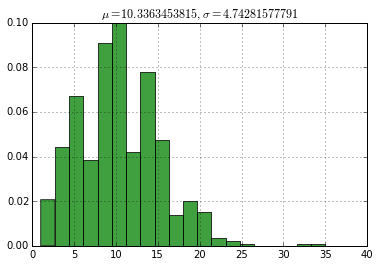

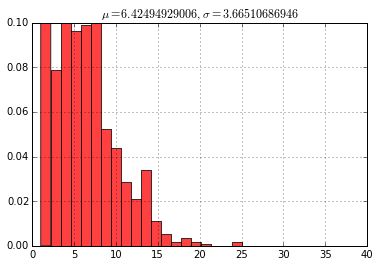




Plotting frequency histogram for base pair GCC


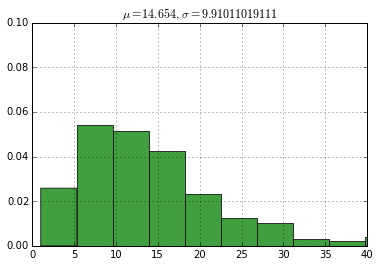

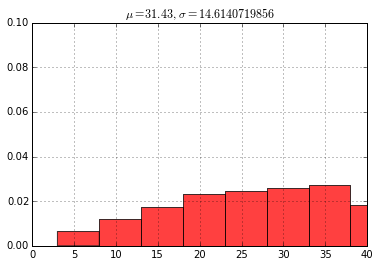




Plotting frequency histogram for base pair GTC


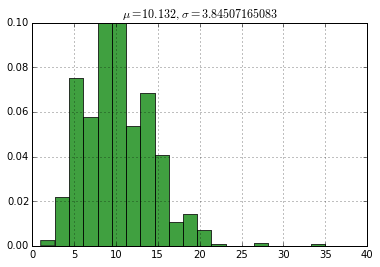

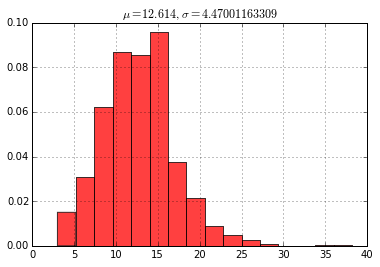




Plotting frequency histogram for base pair GCG


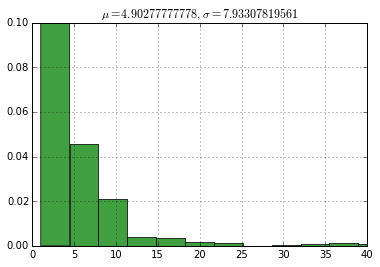

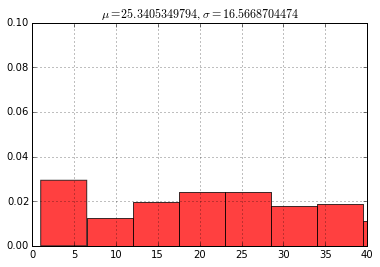




Plotting frequency histogram for base pair GTG


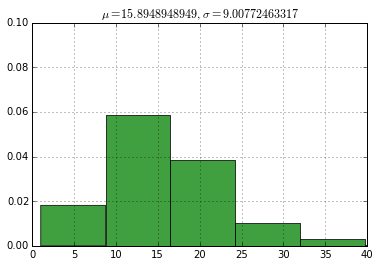

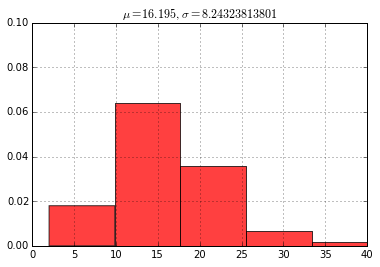




Plotting frequency histogram for base pair TTC


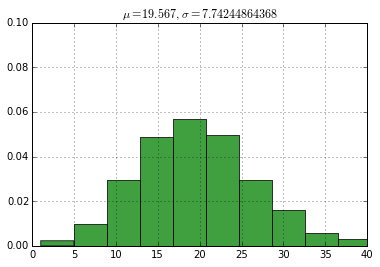

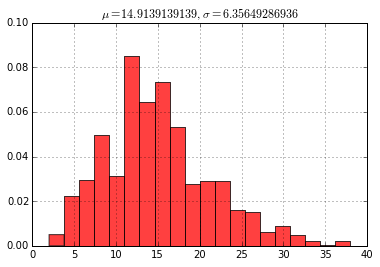




Plotting frequency histogram for base pair GTT


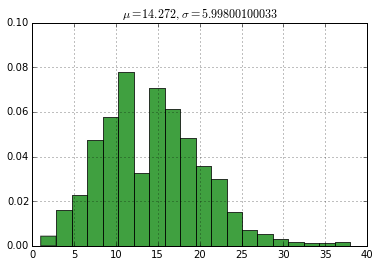

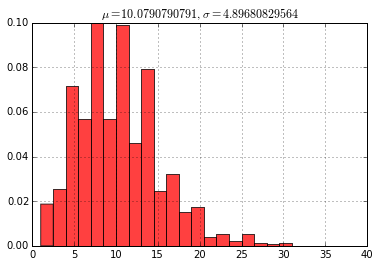




Plotting frequency histogram for base pair GCT


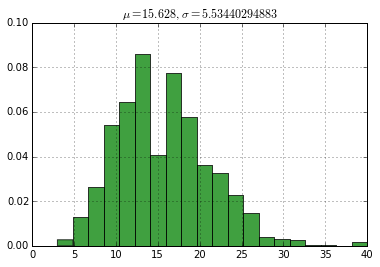

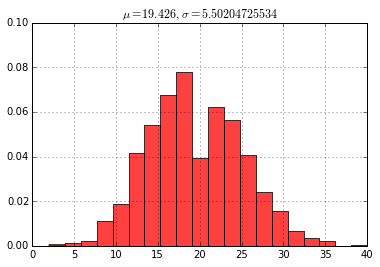




Plotting frequency histogram for base pair ACC


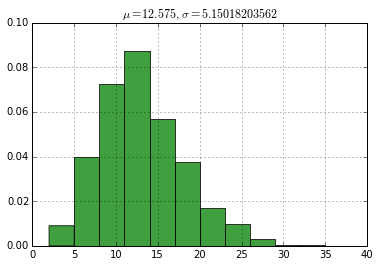

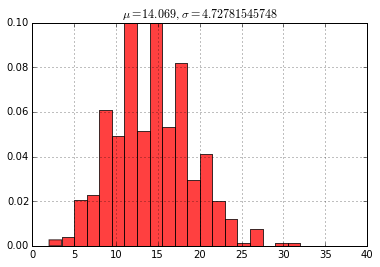




Plotting frequency histogram for base pair TGA


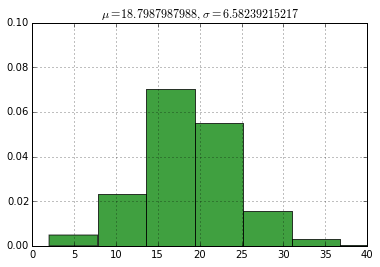

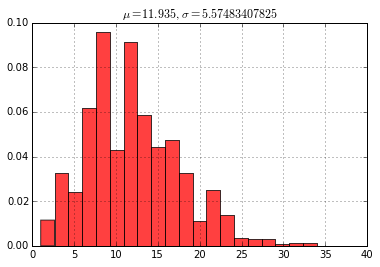




Plotting frequency histogram for base pair GAC


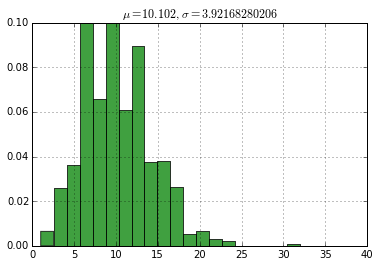

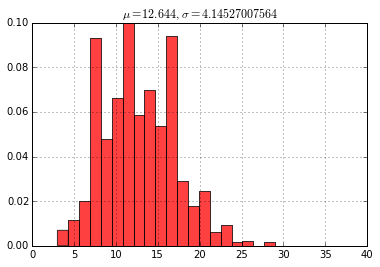




Plotting frequency histogram for base pair CGT


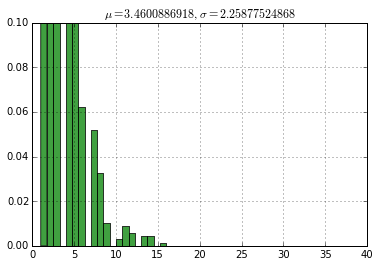

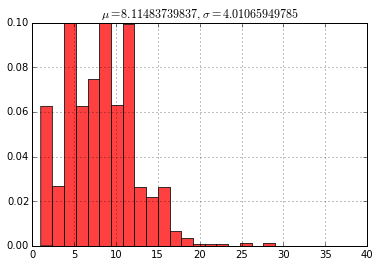




Plotting frequency histogram for base pair TCA


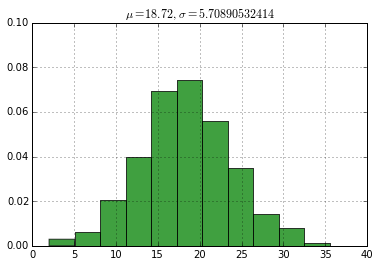

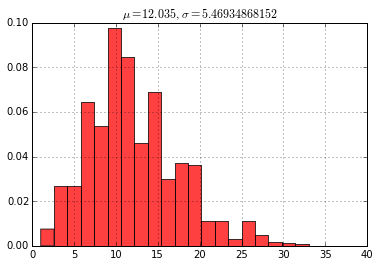




Plotting frequency histogram for base pair CGC


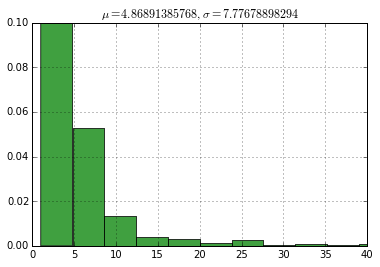

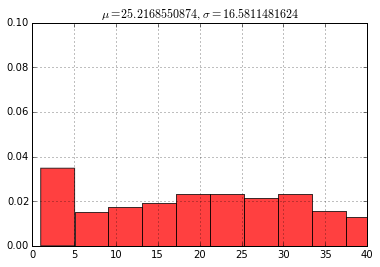

In [7]:
%matplotlib inline

def plot_frequency_hist(frequencies, ngram, color = 'green'):
    n, bins, patches = plt.hist(frequencies, 20, normed=1, facecolor=color, alpha=0.75)
    mu = np.mean(frequencies)
    sigma = np.std(frequencies)
    plt.title(r'$\mathrm{}\mu=' + str(mu) + ',\ \sigma=' + str(sigma) + '$')
    plt.axis([0.0, 40.0, 0.0, 0.1])
    # Note: there is a value lower, ths has cut some extremes
    plt.grid(True)
    plt.show()

for base_pair in enhancer_frequencies.keys():
    print 'Plotting frequency histogram for base pair ' + str(base_pair)
    plot_frequency_hist(enhancer_frequencies[base_pair], base_pair)
    plot_frequency_hist(promoter_frequencies[base_pair], base_pair, 'red')
    print "\n\n"

In [8]:
print len(promoter_frequencies.keys())
import csv
with open('possible_trigrams.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(promoter_frequencies.keys())

64
